In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 128)         131200    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 1, 1, 128)        

In [17]:
stats = model.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

Epoch 1/6
1563/1563 [==============================] - 86s 55ms/step - loss: 0.5021 - accuracy: 0.8239 - val_loss: 1.0464 - val_accuracy: 0.6910
Epoch 2/6
1563/1563 [==============================] - 85s 54ms/step - loss: 0.4675 - accuracy: 0.8352 - val_loss: 1.1190 - val_accuracy: 0.6834
Epoch 3/6
1563/1563 [==============================] - 83s 53ms/step - loss: 0.4242 - accuracy: 0.8511 - val_loss: 1.0880 - val_accuracy: 0.6938
Epoch 4/6
1563/1563 [==============================] - 88s 56ms/step - loss: 0.4012 - accuracy: 0.8594 - val_loss: 1.1841 - val_accuracy: 0.6819
Epoch 5/6
1563/1563 [==============================] - 93s 59ms/step - loss: 0.3677 - accuracy: 0.8711 - val_loss: 1.2003 - val_accuracy: 0.6861
Epoch 6/6
1563/1563 [==============================] - 90s 58ms/step - loss: 0.3400 - accuracy: 0.8796 - val_loss: 1.3401 - val_accuracy: 0.6832


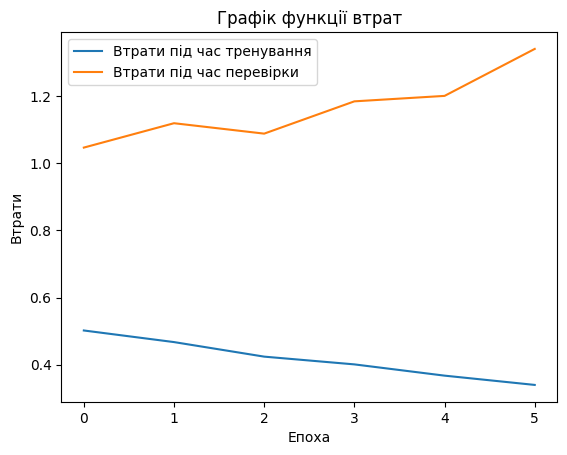

In [23]:
plt.plot(stats.history['loss'], label='Втрати під час тренування')
plt.plot(stats.history['val_loss'], label='Втрати під час перевірки')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title("Графік функції втрат")
plt.legend()

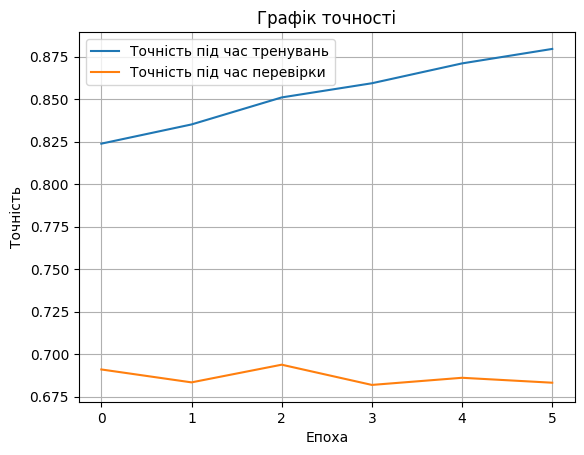

In [24]:
plt.plot(stats.history['accuracy'], label='Точність під час тренувань')
plt.plot(stats.history['val_accuracy'], label='Точність під час перевірки')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 1.3401 - accuracy: 0.6832
Test Accuracy:  0.6832000017166138


In [21]:
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
random_labels = y_test[random_indices]

predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 38ms/step


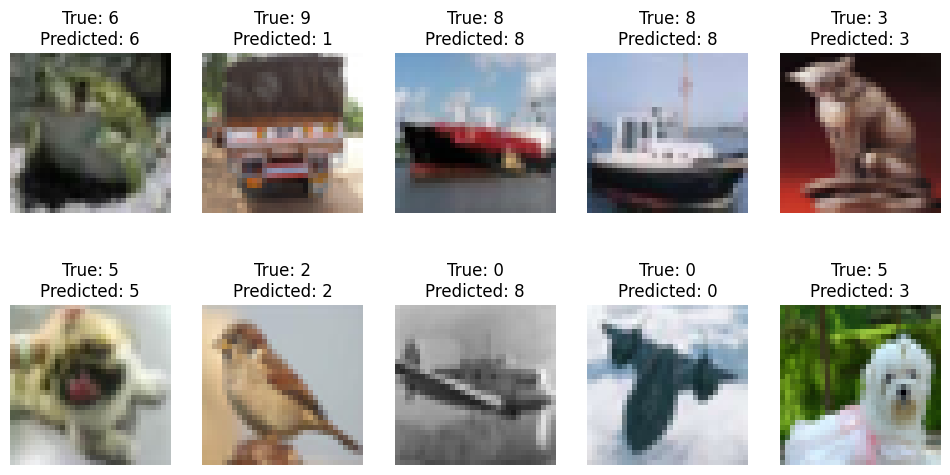

In [22]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[random_indices[i]].reshape((32, 32, 3)))

    true_label = np.argmax(y_test[random_indices[i]])

    plt.title(f'True: {true_label}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')

plt.show()

In [ ]:
#Висновок: додавання згорткових шарів значно підвищило точність розпізнавання зображень. 6 епох - оптимальна кількість, після якої покращення стають менш помітними. Завдяки цьому мережа успішно розпізнала 7 з 10 зображень.